In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
df=pd.read_csv("Churn_Modelling.csv")

In [59]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [62]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [63]:
df.drop(["RowNumber","CustomerId","Surname"],axis="columns",inplace=True)

In [64]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [65]:
def check(df):
    for i in df:
        if df[i].dtypes=="object":
            print(f"{i} : {df[i].unique()}")

In [66]:
check(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [67]:
df["Gender"].replace({"Female":1,"Male":0},inplace=True)

# one hot encding 


In [76]:
df=pd.get_dummies(data=df,columns= ["Geography"])

In [77]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [78]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
column=["CreditScore","Balance","EstimatedSalary","Tenure","NumOfProducts"]
df[column]=scalar.fit_transform(df[column])

In [79]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                    int64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [80]:
x=df.drop("Exited",axis="columns")
y=df["Exited"]

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [82]:
x_train.shape

(8000, 12)

In [83]:
y_train.shape

(8000,)

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation="relu"),
     keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1,activation="sigmoid")
])

# 

In [87]:
model.compile(optimizer='adam',
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [92]:
model.fit(x_train,y_train,epochs=95)

Epoch 1/95
250/250 [==============================] - 0s 925us/step - loss: 0.4136 - accuracy: 0.8267
Epoch 2/95
250/250 [==============================] - 0s 761us/step - loss: 0.4136 - accuracy: 0.8281
Epoch 3/95
250/250 [==============================] - 0s 847us/step - loss: 0.4131 - accuracy: 0.8275
Epoch 4/95
250/250 [==============================] - 0s 801us/step - loss: 0.4126 - accuracy: 0.8281
Epoch 5/95
250/250 [==============================] - 0s 971us/step - loss: 0.4126 - accuracy: 0.8288
Epoch 6/95
250/250 [==============================] - 0s 887us/step - loss: 0.4125 - accuracy: 0.8286
Epoch 7/95
250/250 [==============================] - 0s 996us/step - loss: 0.4122 - accuracy: 0.8292
Epoch 8/95
250/250 [==============================] - 0s 852us/step - loss: 0.4119 - accuracy: 0.8284
Epoch 9/95
250/250 [==============================] - 0s 771us/step - loss: 0.4133 - accuracy: 0.8276
Epoch 10/95
250/250 [==============================] - 0s 773us/step - loss: 0.412

In [93]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 988us/step - loss: 0.4042 - accuracy: 0.8290


[0.4042336940765381, 0.8289999961853027]

In [99]:
yb=model.predict(x_test)

63/63 [==============================] - 0s 953us/step


In [100]:
len(yb)

2000

In [111]:
yb


array([[0.09721568],
       [0.09470464],
       [0.09425397],
       ...,
       [0.06478832],
       [0.06907573],
       [0.10186916]], dtype=float32)

In [107]:
y_predict=[]
for i in yb:
    if i>=0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1595
           1       0.64      0.35      0.45       405

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [114]:

cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)



[[1516   79]
 [ 263  142]]


In [120]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [125]:
import seaborn

<AxesSubplot:>

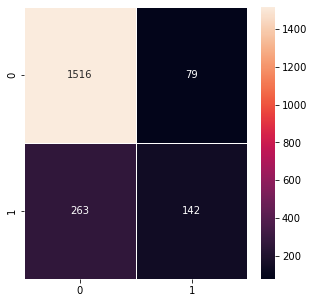

In [126]:

fig, ax = plt.subplots(figsize=(5,5))
seaborn.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

